<a href="https://colab.research.google.com/github/spshreya/21daysofML/blob/main/lstm_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving perrin-freres-monthly-champagne-.csv to perrin-freres-monthly-champagne- (1).csv


In [4]:
pip install scalecast --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [9]:
df.dropna(axis=0, inplace=True)
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
df['Month']=pd.to_datetime(df['Month'])
df.columns=['month','sales']

In [13]:
sns.set(rc={'figure.figsize':(15,8)})

In [15]:
f = Forecaster(y=df['sales'],
                   current_dates=df['month'])

In [16]:
f

Forecaster(
    DateStartActuals=1964-01-01T00:00:00.000000000
    DateEndActuals=1972-09-01T00:00:00.000000000
    Freq=MS
    N_actuals=105
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
)

  return rho, np.sqrt(sigmasq)



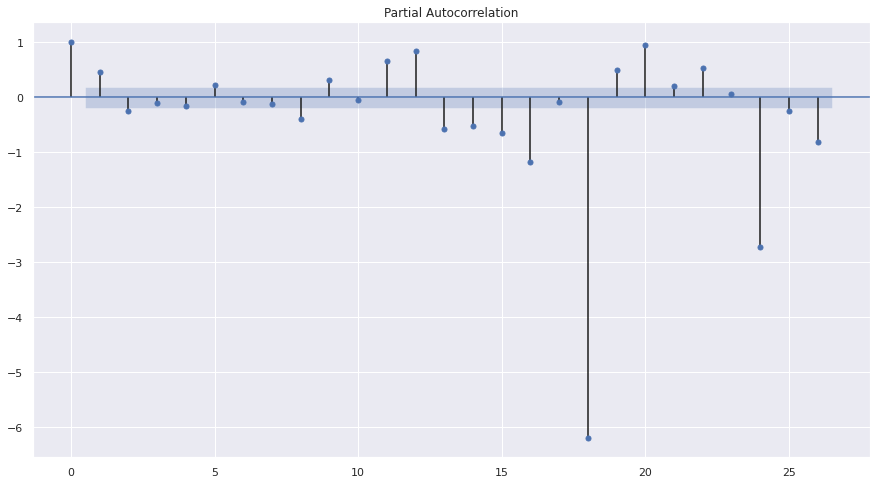

In [18]:
f.plot_pacf(lags=26)
plt.show()

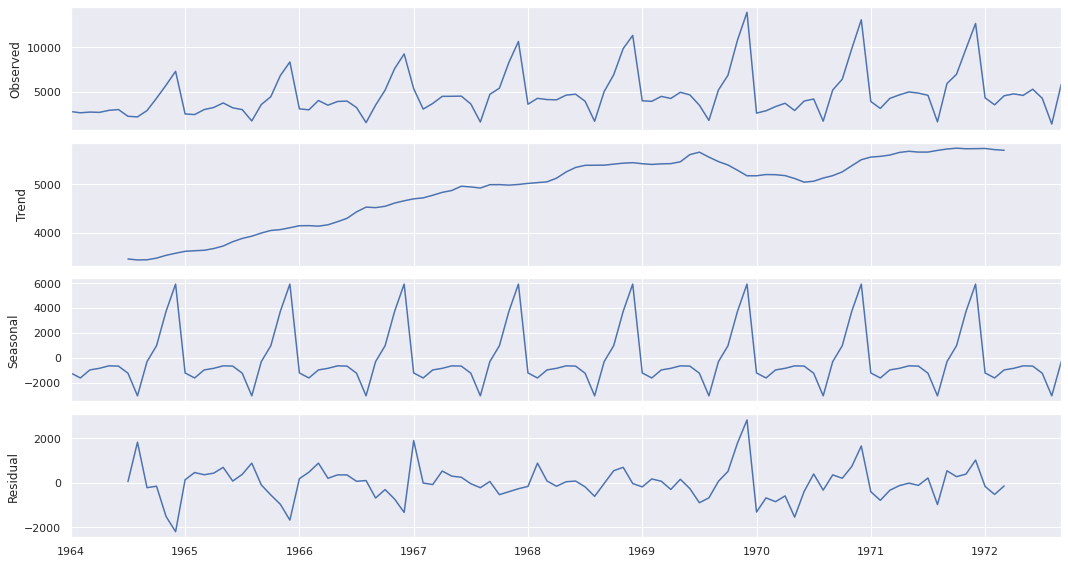

In [19]:
f.seasonal_decompose().plot()
plt.show()

In [20]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)

In [21]:
stat

-1.8335930563276188

In [23]:
pval

0.363915771660247

In [24]:
len(df)

105

In [27]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

3/3 [==============================] - 2s 5ms/step - loss: 0.2810


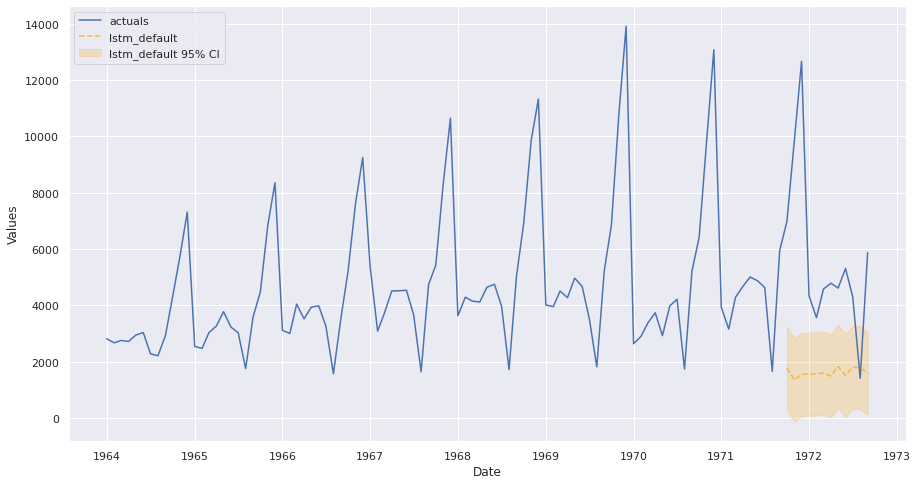

In [28]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

3/3 [==============================] - 2s 12ms/step - loss: 0.3191


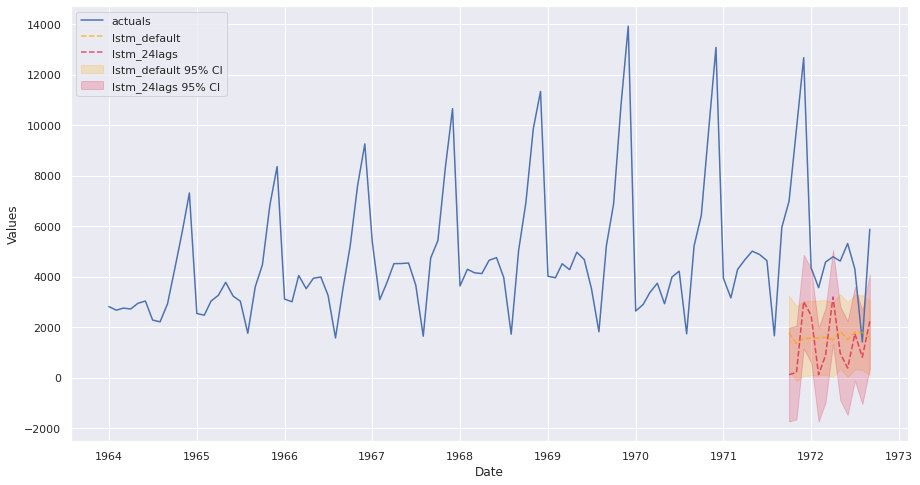

In [29]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)